In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import f1_score, accuracy_score

## Perceptron

In [3]:
class Perceptron:
    def preprocess(self, X: np.ndarray) -> np.ndarray:
        """Apply transformations to the data to ease learning.

        Transformations include: Normalization (mean zero, std. deviation 1);

        Args:
            X (np.ndarray): Input data.

        Returns:
            np.ndarray: Preprocessed data.
        """
        return (X - X.mean(axis=0)) / X.std(axis=0)

    def predict(self, X: np.ndarray, w: np.ndarray) -> np.ndarray:
        """Do a forward pass using the inputs and weights specified.

        Args:
            X (np.ndarray): Inputs (With or Without bias column added)
            w (np.ndarray): Weights (If bias is present, it should be in the first column)

        Returns:
            np.ndarray: Predictions
        """
        # Add a column of ones at the start of the array if the shapes don't match
        X = self._add_ones(X) if X.shape[1] < len(w) else X
        # Apply weights and biases
        net = np.dot(X, w)
        # Apply activation function
        out = np.heaviside(net, 0)
        
        return out
    
    def fit(self, 
            X: np.ndarray,
            y: np.ndarray,
            w: np.ndarray,
            lr: float = 0.1,
            epochs: int = 1,
    ) -> None:
        """Fits the perceptron to the given target labels

        Args:
            X (np.ndarray): Inputs (Dataset)
            y (np.ndarray): Target (Labels)
            w (np.ndarray): Starting weights
            lr (float, optional): Learning Rate. Defaults to 0.1.
            epochs (int, optional): Number of training epochs. Defaults to 1.
        
        Returns:
            np.ndarray: updated weights and bias.
        """
        # Add a column of ones at the start of the array if the shapes don't match
        X = self._add_ones(X) if X.shape[1] < len(w) else X
        
        for epoch in range(epochs):
            predictions = self.predict(X, w)
            total_correct_pred = 0
            for example, pred, target in zip(X, predictions, y):
                error = target-pred
                total_correct_pred += 1 if error == 0 else 0
                delta_w = lr*example*(error)
                w += delta_w
            print(
                f"Epoch {epoch+1}/{epochs} - "
                f"Correct predictions = {total_correct_pred}/{len(X)} - "
                f"Weights = {[float(f'{w_:.2f}') for w_ in w]}"
            )
        return w

    def _add_ones(self, X: np.ndarray) -> np.ndarray:
        """Add a column of ones to the start of the array 

        Args:
            X (np.ndarray): Target array

        Returns:
            np.ndarray: Array with the extra column added
        """
        ones_col = np.ones((X.shape[0], 1))
        return np.concatenate([ones_col, X], axis=1)

In [4]:
p = Perceptron()

## Read the dataset and splits data from labels

### Simple Dataset

In [5]:
# Load csv file
simple_dataset = pd.read_csv('simple_diabetes.csv')

# Shuffle the dataset (all labels are currently all 0 then all 1)
simple_dataset = simple_dataset.sample(frac=1).reset_index(drop=True)

# Split dataset
y_simple = simple_dataset['class'].to_numpy()
X_simple = simple_dataset.drop('class', axis=1).to_numpy()

<Axes: xlabel='plas', ylabel='mass'>

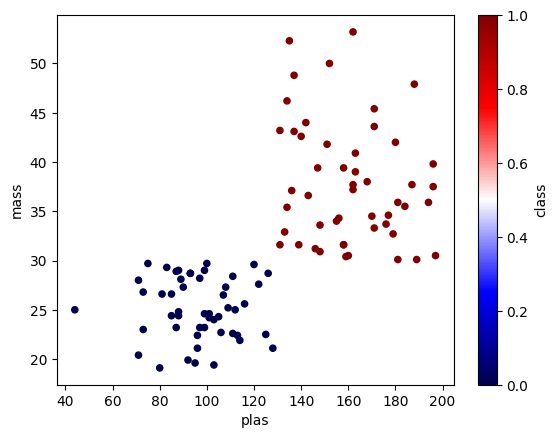

In [6]:
# Plot para visualizar os dados
simple_dataset.plot.scatter('plas', 'mass', c='class', cmap='seismic')

In [7]:
np.random.seed(2)

# Preprocess data
X_simple = p.preprocess(X_simple)

w_simple = p.fit(
    X = X_simple,
    y = y_simple,
    w = np.random.uniform(0, 1, X_simple.shape[1]+1),
    lr = 0.1,
    epochs = 10,
)

print("Final trained weights: ", w_simple)

pred_simple = p.predict(X_simple, w_simple)
print(
    f"\nMetrics:\n"
    f"\t- F1 = {f1_score(y_simple, pred_simple):.3f}\n"
    f"\t- Accuracy = {accuracy_score(y_simple, pred_simple)}"
)

Epoch 1/10 - Correct predictions = 78/100 - Weights = [-1.76, 1.98, 1.48]
Epoch 2/10 - Correct predictions = 87/100 - Weights = [-0.46, 2.58, 1.68]
Epoch 3/10 - Correct predictions = 99/100 - Weights = [-0.36, 2.58, 1.68]
Epoch 4/10 - Correct predictions = 99/100 - Weights = [-0.26, 2.59, 1.68]
Epoch 5/10 - Correct predictions = 99/100 - Weights = [-0.16, 2.6, 1.68]
Epoch 6/10 - Correct predictions = 100/100 - Weights = [-0.16, 2.6, 1.68]
Epoch 7/10 - Correct predictions = 100/100 - Weights = [-0.16, 2.6, 1.68]
Epoch 8/10 - Correct predictions = 100/100 - Weights = [-0.16, 2.6, 1.68]
Epoch 9/10 - Correct predictions = 100/100 - Weights = [-0.16, 2.6, 1.68]
Epoch 10/10 - Correct predictions = 100/100 - Weights = [-0.16, 2.6, 1.68]
Final trained weights:  [-0.1640051   2.59686129  1.68372491]

Metrics:
	- F1 = 1.000
	- Accuracy = 1.0


### Complete Dataset

In [8]:
# Load csv file
complete_dataset = pd.read_csv(
    'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv',
    header=None
)

# Shuffle the dataset (all labels are currently all 0 then all 1)
complete_dataset = complete_dataset.sample(frac=1).reset_index(drop=True)

# Split dataset
last_col = complete_dataset.columns[-1] # Last column = labels
y_complete = complete_dataset[last_col].to_numpy()
X_complete = complete_dataset.drop(last_col, axis=1).to_numpy()

In [9]:
np.random.seed(2)

# Preprocess data
X_complete = p.preprocess(X_complete)

w_complete = p.fit(
    X = X_complete,
    y = y_complete,
    w = np.random.uniform(0, 1, X_complete.shape[1]+1),
    lr = 0.1,
    epochs = 10,
)

print("Final trained weights: ", w_complete)

pred_complete = p.predict(X_complete, w_complete)
print(
    f"\nMetrics:\n"
    f"\t- F1 = {f1_score(y_complete, pred_complete):.3f}\n"
    f"\t- Accuracy = {accuracy_score(y_complete, pred_complete)}"
)

Epoch 1/10 - Correct predictions = 478/768 - Weights = [-17.16, 1.35, -1.14, -11.79, -12.85, -9.77, -3.38, -7.8, -2.59]
Epoch 2/10 - Correct predictions = 418/768 - Weights = [-10.76, 8.45, 19.95, 4.8, 11.54, 8.22, 19.32, 8.5, 6.14]
Epoch 3/10 - Correct predictions = 556/768 - Weights = [-13.56, 6.51, 15.39, -3.88, -1.89, -2.62, 11.53, 5.0, 3.49]
Epoch 4/10 - Correct predictions = 596/768 - Weights = [-7.16, 3.21, 9.78, -3.87, -0.32, -2.36, 9.72, 3.56, -0.19]
Epoch 5/10 - Correct predictions = 592/768 - Weights = [-2.16, 3.95, 4.41, -2.93, -0.97, -3.62, 4.09, 1.3, 1.22]
Epoch 6/10 - Correct predictions = 556/768 - Weights = [-3.76, -7.95, 5.35, 0.13, 10.35, 9.66, 5.3, 3.3, -8.38]
Epoch 7/10 - Correct predictions = 423/768 - Weights = [-10.06, 15.19, 13.49, -0.85, -9.69, -6.87, 3.55, 0.48, 12.61]
Epoch 8/10 - Correct predictions = 527/768 - Weights = [-10.56, -0.33, 16.41, -2.84, 4.99, 5.73, 12.34, 6.76, -3.76]
Epoch 9/10 - Correct predictions = 570/768 - Weights = [-8.76, 9.02, 12.47, 